In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


In [2]:
df= pd.read_csv("/kaggle/input/diabetes-dataset/diabetes2.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df[df.duplicated(keep=False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
X_df=df.drop(["Outcome"],axis=1)
y= df["Outcome"].values.reshape(-1,1)


# NORMALİZATİON

In [19]:
X=(X_df - np.min(X_df)) / (np.max(X_df) - np.min(X_df))

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


# TRAİN TEST SPLİT

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8, 614) (8, 154) (1, 614) (1, 154)


# parameter initialize ,sigmoid function and logistic regression



In [22]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b = 0.0
    
    return w,b

def sigmoidFunc(z):
    y_head=1/(1+np.exp(-z))
    
    return y_head


def forward_bacward_propagation(w,b,X_train,y_train):
    z=np.dot(w.T,X_train)+b
    
    y_head=sigmoidFunc(z)
    
    loss= -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)
    
    costFunc=(np.sum(loss))/X_train.shape[1] #normalization işlemi yaptık değleri 0-1 arasına çektik bölerek
    
    derivative_weight= (np.dot(X_train,(y_head-y_train).T))/X_train.shape[1]
    
    derivative_bias= (np.sum((y_head-y_train)))/X_train.shape[1]
    
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}

    return costFunc,gradients



    

In [23]:
def update(w,b,X_train,learning_rate,number_of_iteration):
    costFunclist=[]
    costFunclist2=[]
    index=[]
    for i in range(number_of_iteration):
        costFunc,gradients= forward_bacward_propagation(w,b,X_train,y_train)
        costFunclist.append(costFunc)
        
        
        w= w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        
        if i %100 ==0:
            costFunclist2.append(costFunc)
            index.append(i)
            
            print("Cost after iteration %i: %f" %(i,costFunc))
            
            
    parameters= {"weight":w,"bias":b}
    plt.plot(index,costFunclist2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("number of iteration")
    plt.ylabel("CostFunc")
    plt.show()
    
    return parameters,gradients,costFunclist


def predict(w,b,X_test):
    
    z=sigmoidFunc(np.dot(w.T,X_test)+b)
    
    Y_prediction= np.zeros((1,X_test.shape[1]))
    
    for i in range(z.shape[1]):
            if z[0,i]<=0.5:
                Y_prediction[0,i]=0

            else:
                    Y_prediction[0,i]=1
    return Y_prediction
        

Cost after iteration 0: 0.693601
Cost after iteration 100: 0.617825
Cost after iteration 200: 0.600129
Cost after iteration 300: 0.585977
Cost after iteration 400: 0.574479
Cost after iteration 500: 0.565066
Cost after iteration 600: 0.557303
Cost after iteration 700: 0.550848
Cost after iteration 800: 0.545440
Cost after iteration 900: 0.540873
Cost after iteration 1000: 0.536986
Cost after iteration 1100: 0.533653
Cost after iteration 1200: 0.530774
Cost after iteration 1300: 0.528270
Cost after iteration 1400: 0.526077


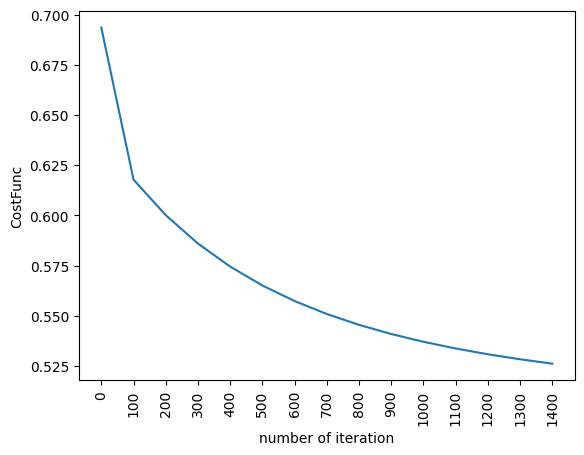

test accuracy:76.62337662337663 %


In [24]:
def logistic_regression(X_train,y_train,X_test,y_test,learning_rate,number_of_iteration):
    
    dimension=X_train.shape[0]
    w,b=initialize_weights_and_bias(dimension)
    
    parameters,gradients,costFunclist=update(w,b,X_train,learning_rate,number_of_iteration)
    
    Y_prediction_test=predict(parameters["weight"],parameters["bias"],X_test)
    
    #print("test accuracy:{} %".format(100-np.mean(np.abs(Y_prediction_test-y_test))*100)) #100 değerim var 90 ını doğru bildiysem 100-10 90 dan 
    return print("test accuracy:{} %".format(100-np.mean(np.abs(Y_prediction_test-y_test))*100))
    


logistic_regression(X_train, y_train, X_test, y_test, learning_rate=4, number_of_iteration=1500)

>  **DATASET** : https://www.kaggle.com/datasets/kandij/diabetes-dataset/